# Characterization of anisotropic hyperelastic, with evolutionary strategies.

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Author: Claudio Canales Donoso
- Lab of Biomechanics and Biomaterials.
- University of Santiago of Chile.
- Date: 25/03/22

License: BSD 3 clause

**Content** : Fitting procedure of arteries.
- characterization of Holzapfel 2015 with evolutionary strategies.
- Transveral stretch stabilization
- Incorporation of **Numba** for compilation of functions.

For more details, please refer to this [webpage](https://ccdonoso.github.io/publications.html).

### Libraries

In [5]:
%pylab inline
#This module do the magic
import holza2015opt as hz
#this is just numpy
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Example of how to plot the longitudinal and circumferential stress and transversal stretcehs curves, with the Holzapfel 2015 model.

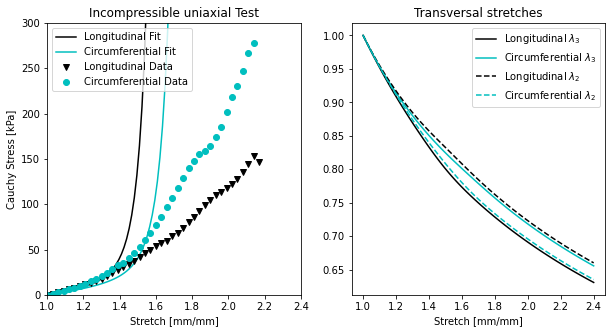

In [6]:
# Load the experimental data
dat_l = np.loadtxt(fname="experimental_data/CTL-axial.mea",dtype=float64)
dat_c = np.loadtxt(fname="experimental_data/CTL-radial.mea",dtype=float64)

#Wrap-up the experimental data in the following list:
experimental_data = [dat_l[:240:6,:2],dat_c[:240:6,:2]]

#Setting up the plot information
plot_info = {"longitudinal_stretch": np.linspace(1,2.4,100),
             "circumferential_stretch": np.linspace(1,2.4,100),
             "x_limits": [1, 2.4],
             "y_limits" : [0, 300],
             "parameters" : [10.84,0.265,0.1343,39.73, 32.31,56.168*np.pi/180.],
             "figsize": [10, 5],
             "fig_name" : "plots/test_curves_plot.pdf"
            }

#Run the function that plots the
hz.holzapfel2015_lon_cir_plotter(plot_info,experimental_data=experimental_data,save_fig=True) 

## Running the evolutionary loop on the uniaxial curves.

You only need to set-up the optimization algorithms parameters

In [7]:
optimization_info = {"lower_bound": [0.,0.,0.,0.,0.,0.],
                     "upper_bound": [100.,1./3.,1.,100.,3.,np.pi/2.],
                     "popsize": 30,
                     "generations": 400,
                     "experimental_data": experimental_data}

parameters_optimized = hz.holzapfel2015_uniaxial_evo_characterization(optimization_info)

CommaEA running on problem Problem


/home/dinhomamen/Desktop/Evolutionary hyperelastic characterization/holza2015opt.py:139: RuntimeWarning: overflow encountered in square
  error = np.sqrt(np.square(sl1-lon_curv[:,1]).sum()) + np.sqrt(np.square(sc1-cir_curv[:,1]).sum())


Resource exhausted: problem evaluations
Algorithm terminated
Objective value: 66.10010723859624
Consumed iterations: 60000


## Plotting the parameters obtained with the evolutionary loop.

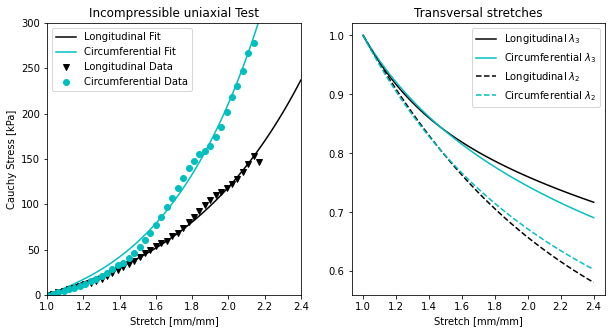

In [9]:
#Notice that "ea.population[0].phenome" is a list that contains the best arguments
#that minimizes the objective function

#In this case, everythings is ready in parameters optimized



#Setting up the plot information
plot_info = {"longitudinal_stretch": np.linspace(1,2.4,100),
             "circumferential_stretch": np.linspace(1,2.4,100),
             "x_limits": [1, 2.4],
             "y_limits" : [0, 300],
             "parameters" : parameters_optimized,
             "figsize": [10, 5],
             "fig_name" : "plots/Curves fitted.pdf"
            }

#Run the function that plots the
hz.holzapfel2015_lon_cir_plotter(plot_info,experimental_data=experimental_data,save_fig=True) 

# Reference:

[1] Rivera, E., Canales, C., Pacheco, M. et al. Biomechanical characterization of the passive response of the thoracic aorta in chronic hypoxic newborn lambs using an evolutionary strategy. Sci Rep 11, 13875 (2021). https://doi.org/10.1038/s41598-021-93267-9